In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from astropy.io import fits

In [3]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [28]:
fnames = glob.glob('/data2/GBT/*/OnOff/*/*.fits')
fnames.sort()
print len(fnames)

420


In [5]:
f = fits.open(fnames[10])
hdu = f[1]
data = hdu.data['DATA']
N = 2**14
df = hdu.data['CDELT1'][0]
center_freq = hdu.data['CRVAL1'][0]
centerbin = hdu.data['CRPIX1'][0]
index = np.arange(N)
if_freqs = freqstest = index * (-df)
freqs = (center_freq + df * (index + 1 - centerbin))[::-1]
mask = np.ones(N, dtype=bool)
mask[(index % 512) == 511] = False
mask[if_freqs < 150.e6] = False
mask[if_freqs > 1400.e6] = False

xxoff = data[::8, ::-1]
xxoff[:, ~mask] = np.nan

ratio = np.nanstd(xxoff, 0) / np.nanmean(xxoff, 0)
ratio_mad = 5. / 0.67449 * mad(ratio)
bad = np.abs(ratio - np.nanmean(ratio)) > ratio_mad
mask[bad] = False
xxoff[:, ~mask] = np.nan

msdata = xxoff - np.nanmean(xxoff, 0)
speck= np.nanmean((msdata**4), 0) / np.nanmean((msdata**2), 0)**2
speck_mad = 5. / 0.67449 * mad(speck)
bad = np.abs(speck - np.nanmean(speck)) > speck_mad
mask[bad] = False
xxoff[:, ~mask] = np.nan

/usr/lib64/python2.7/site-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in greater


In [9]:
xxstd = np.nanstd(xxoff, 0)

In [10]:
xxreduced = np.nanmean(xxoff.reshape(-1, 512, N/512), 2)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [11]:
totvar = np.nansum((xxstd**2).reshape(-1, 512), 0)

In [12]:
totvar.shape

(512,)

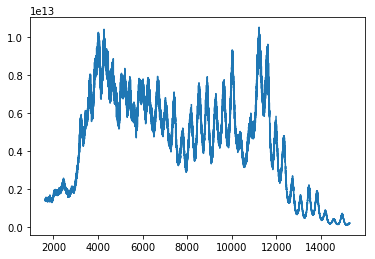

In [13]:
plot(xxstd**2)

(100000000000000.0, 120000000000000.0)

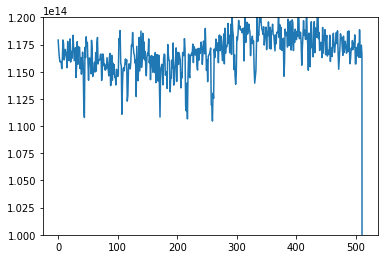

In [19]:
plot(totvar)
ylim(1e14, 1.2e14)

In [20]:
xxweighted = xxoff / xxstd**2

In [23]:
xxwred = np.nanmean(xxweighted.reshape(-1, 512, N/512), 2) / totvar

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


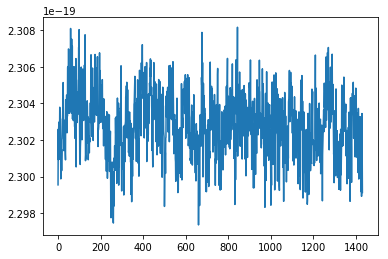

In [26]:
plot(np.nanmean(xxwred, 1))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


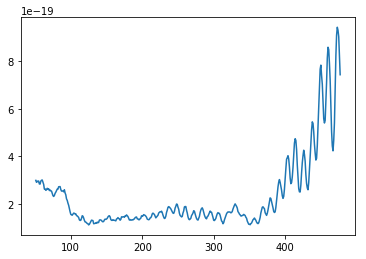

In [27]:
plot(np.nanmean(xxwred, 0))